In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [2]:
data=pd.read_csv("datasets/titanic/train.csv")

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
sample=data.drop(["PassengerId","Name","Ticket","Fare","Cabin","Embarked"],axis=1)

In [5]:
sample.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0


In [6]:
sample["Sex"]=LabelEncoder().fit_transform(sample["Sex"])

In [7]:
sample[:5]

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,1,22.0,1,0
1,1,1,0,38.0,1,0
2,1,3,0,26.0,0,0
3,1,1,0,35.0,1,0
4,0,3,1,35.0,0,0


In [8]:
sample.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594
std,0.486592,0.836071,0.477990,14.526497,1.102743,0.806057
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,20.125000,0.000000,0.000000
50%,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000
75%,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000


In [59]:
processed=sample.dropna()

In [10]:
model=processed.groupby(["Pclass","Sex"]).mean()[["Age"]].reset_index()  ###gourpby work with mean

In [11]:
model

,Pclass,Sex,Age
0,1,0,34.611765
1,1,1,41.281386
2,2,0,28.722973
3,2,1,30.740707
4,3,0,21.750000
5,3,1,26.507589


In [12]:
unpro=sample.loc[sample["Age"].isna()]

In [13]:
def Agefill(row):
    row["Age"]=model.loc[(row["Pclass"]==model["Pclass"]) & (row["Sex"]==model["Sex"])].describe().loc["mean","Age"]
    return row

In [14]:
processed1=unpro.apply(Agefill,axis=1)

In [15]:
total_data=pd.concat([processed,processed1])

In [16]:
total_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0.0,3.0,1.0,22.0,1.0,0.0
1,1.0,1.0,0.0,38.0,1.0,0.0
2,1.0,3.0,0.0,26.0,0.0,0.0
3,1.0,1.0,0.0,35.0,1.0,0.0
4,0.0,3.0,1.0,35.0,0.0,0.0


In [17]:
a=total_data.iloc[:,2]

In [18]:
a.mean()

0.6475869809203143

In [19]:
## Decision Tree

In [20]:
X=total_data.drop(["Survived"],axis=1)
y=total_data["Survived"]

In [21]:
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.33, random_state=42)

In [23]:
model=DecisionTreeClassifier()

In [24]:
model.fit(X_train,y_train)  ## max_feature = no. of col ,, 

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [25]:
model.score(X_test,y_test)

0.7932203389830509

In [26]:
model.predict(X[:10])

array([0., 1., 1., 1., 0., 0., 0., 1., 1., 1.])

In [27]:
def entropy(data):
    full,count=np.unique(data,return_counts=True)
    p=count/len(data)
    return np.sum(-p*np.log(p))

In [28]:
def info_gain(X,y,label):
    
    x_col=X[label]
    pivot=np.mean(x_col)
    #print(pivot)
    
    left_index  =    x_col<pivot
    right_index =    x_col>=pivot
    
    y_left , y_right = y[left_index] , y[right_index]
    
    ent=entropy(y)
    left_ent=entropy(y_left)
    right_ent=entropy(y_right)
    
    left_p=  len(y_left)/len(y)
    right_p= 1-left_p
    
    return ent - left_ent*left_p - right_ent*right_p 

In [29]:
for col in X.columns:
    print(col , info_gain(X,y,col))

Pclass 0.05253613916173083
Sex 0.15087048925218172
Age 0.0007663481843047659
SibSp 0.006643498134917131
Parch 0.010661126611803073


In [30]:
class Node:
    
    def __init__(self,pivot=None,label=None,result=None):
        self.pivot=pivot
        self.label=label
        self.result=result
       
        self.left=None
        self.right=None
        
    def __repr__(self):
        
        if self.label == None:
            return str(self.result > .5)
        else:
            return str(self.label + " : " + str(self.pivot))

In [1]:
class customTree:
    
    def __init__(self,max_step=5):
        self.maxstep=max_step
        
    def fit(self,X,y):
        self.root=self.rec_fit(X,y,maxx=self.maxstep)
        
    def rec_fit(self,X,y,maxx):
        if maxx==0:
            return Node(result=y.mean())
        
        gains=[]
        for col  in X.columns:
            gains.append((info_gain(X,y,col) , col))
            
        
        selected_gain , col_name = sorted(gains)[-1]
        
        if selected_gain <= 0:
            return Node(result=y.mean())
        
        
        pivots=X[col_name].mean()
        
        left =X[col_name]<pivots
        right=X[col_name]>=pivots
        
        X_left ,X_right = X.loc[left] , X.loc[right]
        y_left ,y_right = y.loc[left] , y.loc[right]
        
        node=Node(pivot=pivots,label=col_name)
        
        node.left=self.rec_fit(X_left,y_left,maxx-1)
        
        node.right=self.rec_fit(X_right,y_right,maxx-1)
        
        return node
    
    def display(self):
        self.display_rec(self.root)
        
    def display_rec(self, node, indent=""):
        if node == None:
            return
        
        print(indent, node)
        self.display_rec(node.left, indent + "\t")
        self.display_rec(node.right, indent + "\t")
        
    def predict_point(self,row):
        return self.predict_point_rec(self.root,row)
      
    def predict_point_rec(self,node,rows):
        
        if node.label==None:
            return node.result
            
        if rows[node.label]<node.pivot:
            return self.predict_point_rec(node.left,rows)
        else:
            return self.predict_point_rec(node.right, rows)
    
    def predict(self,X):
        pree=[]
        
        for index , row in X.iterrows():
            pree.append(self.predict_point(row))
            
        return (np.array(pree) >= .5).astype(int)
    
    def score(self,X,y):
        yp=self.predict(X)
        return (yp==y).mean()

In [69]:
a=customTree()

In [70]:
a.fit(X_train,y_train)

In [71]:
a.display()

 Sex : 0.6593959731543624
	 Pclass : 2.147783251231527
		 Pclass : 1.4272727272727272
			 Parch : 0.5079365079365079
				 Age : 35.84017216642755
					 True
					 True
				 Parch : 1.4545454545454546
					 True
					 True
			 Parch : 0.5531914893617021
				 Age : 32.68153153153153
					 True
					 True
				 Age : 25.764705882352942
					 True
					 True
		 Parch : 0.7634408602150538
			 Age : 23.514150943396228
				 SibSp : 0.225
					 True
					 True
				 SibSp : 0.3076923076923077
					 False
					 False
			 SibSp : 1.925
				 Age : 23.09375
					 True
					 False
				 Age : 12.8125
					 False
					 False
	 Pclass : 2.3587786259541983
		 Pclass : 1.4819277108433735
			 Age : 41.73238314529128
				 SibSp : 0.23529411764705882
					 False
					 True
				 Age : 53.6
					 False
					 False
			 Parch : 0.2125
				 Age : 32.851287113559835
					 False
					 False
				 Age : 12.344999999999999
					 True
					 False
		 Parch : 0.23788546255506607
			 Age : 28.714266912236408
				 Age : 23

In [72]:
a.predict(X_test.iloc[:20])

array([0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0])

In [73]:
a.score(X,y)

0.8215488215488216

In [74]:
a.score(X_test,y_test)

0.8033898305084746

In [75]:
import pydotplus
from sklearn.externals.six  import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz

In [80]:
dot=StringIO()
export_graphviz(model,out_file=dot,filled=True,rounded=True)

In [81]:
graph=pydotplus.graph_from_dot_data(dot.getvalue())

In [83]:
#Image(graph.create_png())

In [84]:
from sklearn.ensemble import RandomForestClassifier

In [86]:
forest=RandomForestClassifier(n_estimators=10,max_depth=5,criterion="entropy")

In [87]:
forest.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [88]:
forest.score(X_train,y_train)

0.8557046979865772

In [89]:
forest.score(X_test,y_test)

0.8169491525423729

In [91]:
from sklearn.model_selection import cross_val_score

In [98]:
acc=cross_val_score(RandomForestClassifier(n_estimators=10,criterion="entropy",max_depth=5),X_train,y_train,cv=5).mean()

In [99]:
print(acc)

0.8188515406162467


In [104]:
accc=[]
for i in range(1,50):
    acc=cross_val_score(RandomForestClassifier(n_estimators=i,max_depth=5),X_train,y_train,cv=5).mean()
    accc.append(acc)

In [106]:
import matplotlib.pyplot as plt

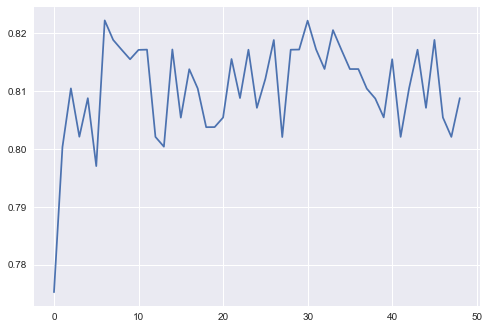

In [108]:
plt.style.use("seaborn")
plt.plot(accc)

In [109]:
np.argmax(accc)

6

In [111]:
forest_test=RandomForestClassifier(n_estimators=6,max_depth=5,criterion="entropy")

In [113]:
forest_test.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=6,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [114]:
forest_test.score(X_train,y_train)

0.837248322147651

In [115]:
forest_test.score(X_test,y_test)

0.8101694915254237